# Wine dataset - Clustering

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The original dataser can be found [here]( https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

In [3]:
wine_df.shape

(178, 13)

In [4]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [5]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

## Basic statistics

In [6]:
# Let's check just the first 6 features
wine_df.iloc[ : , : 6].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000


#### Correlation between features

In [7]:
wine_df.corr().round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
malic_acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
alcalinity_of_ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
total_phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


## Exploratory analysis

* Plotting with `scatter_matrix`: plotting function to display histograms along the diagonal and the scatter plots for every pair of attributes off the diagonal.

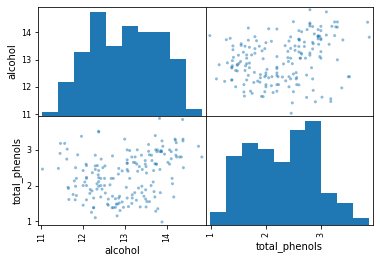

In [8]:
# For ease of use we show just two features
scatter_matrix(wine_df.iloc[ : , [0,5]])

plt.show()

In [9]:
wine_df.iloc[ : , [0,5]]

,alcohol,total_phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80
...,...,...
173,13.71,1.68
174,13.40,1.80
175,13.27,1.59
176,13.17,1.65


As we don’t know the ground truth, we look into the scatter plots to come up with a reasonable candidate for `k`, the number of clusters. There seem to be roughly three subgroups. Remember that there are no right or wrong answers for the number of subgroups. In the real world data, rarely do we find clear clusters; but we come up with our best educated guess. For example, in the scatter plot above, there seem to be three subgroups.

For a better visualization, we use Seaborn's 2D KDE plot:

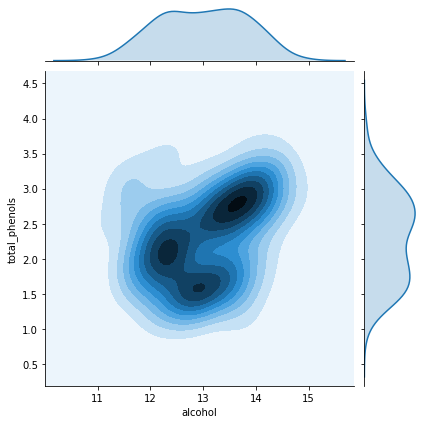

In [12]:
sns.jointplot(x=wine_df['alcohol'], y=wine_df['total_phenols'], kind="kde");

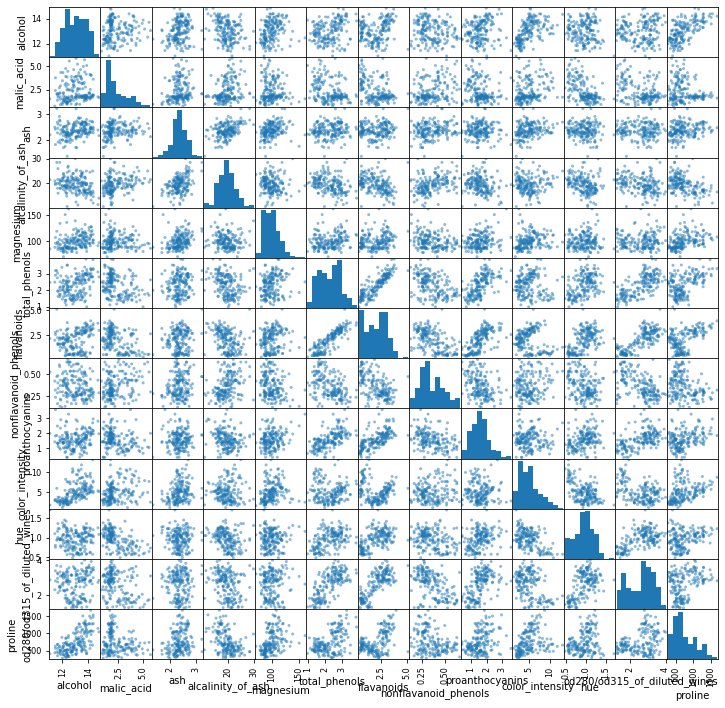

In [17]:
# Seeing all pairs
scatter_matrix(wine_df, figsize=[12,12])

plt.show();

#!!!!

After examining all the pairs of scatter plot, we pick two features to better illustrate the algorithm: `alcohol` and `total_phenols`, whose scatterplot also suggests three subclusters.

In [18]:
X = wine_df[['alcohol', 'total_phenols']]

As we are working with an unsupervised learning model, there is no need for splitting data into train and test.

However, centroid-based algorithms require one pre-processing step because k-means works better on data where each attribute is of similar scales. One way to achieve this is to standardize the data; mathematically:

z = (x - mean) / std

where x is the raw data, mean and std are the average and standard deviation of x, and z is the scaled x such that it is centered at 0 and it has a unit standard deviation. StandardScaler under the sklearn.preprocessing makes it easy:

In [19]:
# Instantiate the scaler
scaler = StandardScaler()

# Compute mean and std to be used for scaling

scaler.fit(X)

StandardScaler()

In [20]:
# Mean
print(scaler.mean_)

# Std
print(scaler.scale_)

[13.00061798  2.29511236]
[0.80954291 0.62409056]


The raw alcohol measurements have a mean 13.00 and std 0.81 while total phenols are centered at 2.29 with a std 0.62. Next we can fit to the training data, and transform it.

In [22]:
X_scaled = scaler.transform(X)

X_scaled[:10]

array([[1.51861254, 0.80899739],
       [0.24628963, 0.56864766],
       [0.19687903, 0.80899739],
       [1.69154964, 2.49144552],
       [0.29570023, 0.80899739],
       [1.48155459, 1.56209322],
       [1.71625494, 0.32829793],
       [1.3086175 , 0.48853108],
       [2.25977152, 0.80899739],
       [1.0615645 , 1.09741707]])

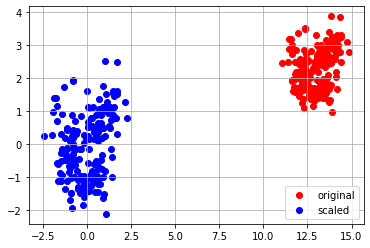

In [23]:
plt.scatter(X['alcohol'],X['total_phenols'], c='r', label = 'original')
plt.scatter(X_scaled[:,0],X_scaled[:,1], c ='b', label= 'scaled')

plt.grid()
plt.legend(loc='lower right');
plt.show();

Let’s do a sanity check to see if each feature is centered at 0 and has a std of 1:

In [24]:
# Sanity check
X_scaled.mean(axis = 0)

array([ 7.84141790e-15, -1.95536471e-16])

In [25]:
X_scaled.std(axis=0)

array([1., 1.])

## K-means Modeling

Just like linear regression and k nearest neighbours, or any machine learning algorithms in scikit-learn, to do the modeling, we follow instantiate / fit / predict workflow. There are other arguments in KMeans, such as method to initialize the centroids, stopping criteria, etc., yet we focus on the number of clusters, n_clusters, and allow other parameters to take the default values. Here we specify 3 clusters:

In [26]:
# Instantiate
kmeans = KMeans(n_clusters = 3)

# Fit
kmeans.fit(X_scaled)

# Make predictions
y_preds = kmeans.predict(X_scaled)

print(y_preds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 0 1 0 1 0 2 1 2 1
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


In [27]:
# Amount of wines in each cluster

unique_wines, counts_wines = np.unique(y_preds, return_counts=True)
print(unique_wines)
print(counts_wines)

[0 1 2]
[60 65 53]


In [28]:
# Turn into dict
clusters = dict(zip(unique_wines, counts_wines))

clusters

{0: 60, 1: 65, 2: 53}

In [29]:
# Coordinates of the three centroids
kmeans.cluster_centers_

array([[-1.06309124,  0.06418028],
       [ 0.92017418,  0.87087204],
       [ 0.07498401, -1.14070754]])

## Let's visualize the results

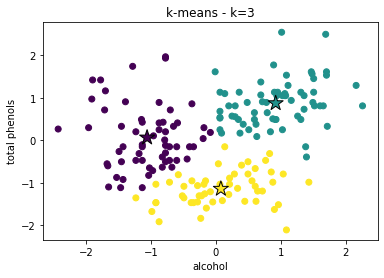

In [30]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = y_preds)

# Identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='*', s = 250, c = [0,1,2], edgecolors='k')

plt.xlabel('alcohol')
plt.ylabel('total phenols')
plt.title('k-means - k=3')
plt.show();

### Predicting 

For any new wine with the chemical report on alcohol and total phenols, we now can classify it based on its distance to each of the centroids. Suppose that there is new wine with alcohol at 13 and total phenols at 2.5, let’s predict which cluster the model will assign the new wine to.

In [31]:
X_new = np.array([[13, 2.5]])

# Standardize new data
X_new_scaled = scaler.transform(X_new)

print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [32]:
kmeans.predict(X_new_scaled)

array([1], dtype=int32)

In [33]:
## Optimizing the number of clusters

### Optimal k: the Elbow Method

Let's check the whole process with k = 4

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 0 3 0 1 3 1 3 3 1 2 1
 0 3 2 3 3 0 0 3 3 2 3 3 3 3 3 3 3 3 2 0 0 0 3 0 0 0 3 3 0 0 3 3 3 2 0 0 0
 0 3 0 0 0 3 3 2 3 0 0 3 1 0 0 0 3 3 3 2 2 2 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 3 2 2 3 1 1 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2]


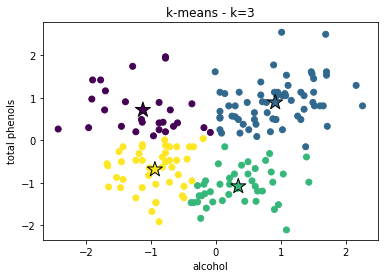

In [34]:
# Instantiate
kmeans = KMeans(n_clusters = 4)

# Fit
kmeans.fit(X_scaled)

# Make predictions
y_preds = kmeans.predict(X_scaled)

print(y_preds)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c = y_preds)

# Identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='*', s = 250, c = [0,1,2,3], edgecolors='k')

plt.xlabel('alcohol')
plt.ylabel('total phenols')
plt.title('k-means - k=3')
plt.show();

Intuitively, k-means problem partitions **n** data points into **k** tight sets such that the data points are closer to each other than to the data points in the other clusters. And the tightness can be measured as the sum of squares of the distance from data point to its nearest centroid, or **inertia**. In scikit-learn, it is stored as `inertia_`, e.g. when k = 2, the distortion is 185:

In [35]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
kmeans.inertia_

185.25081541190127

For k =3:

In [36]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
kmeans.inertia_

114.37290289645735

For different values of k:

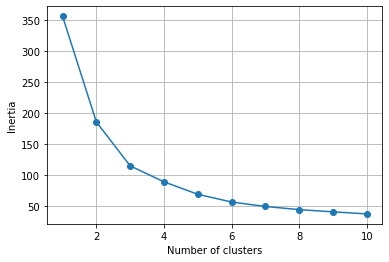

In [37]:
# Calculate inertia for a range of clusters number
inertia = []

for i in np.arange(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Plotting
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show();

As the plot shows, the inertia decreases as the number of clusters increases. The optimal k should be where the inertia no longer decreases as rapidly.

For example, k=3 seems to be optimal, as we increase the number of clusters from 3 to 4, the decrease in inertia slows down significantly, compared to that from 2 to 3. This approach is called elbow method (get it?). It is a useful graphical tool to estimate the optimal k in k-means.

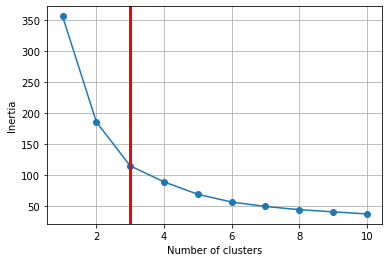

In [38]:

# Plotting
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.axvline(x = 3, linewidth=3, color='r')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show();

### Using all features

In [39]:
X = wine_df

In [40]:
# Standardize
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

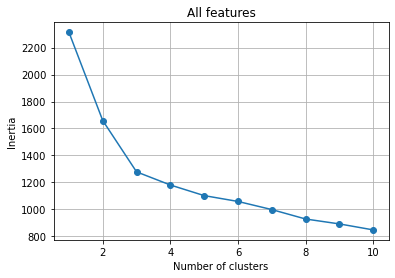

In [41]:
# Plotting inertia to determine optimal k
inertia = []

for i in np.arange(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Plotting
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('All features')
plt.grid()
plt.show();

In [42]:
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_preds = kmeans.predict(X_scaled)
print(y_preds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
# Amount of wines in each cluster

unique_wines, counts_wines = np.unique(y_preds, return_counts=True)
print(unique_wines)
print(counts_wines)

# Turn into dict
clusters = dict(zip(unique_wines, counts_wines))

clusters

[0 1 2]
[51 62 65]


{0: 51, 1: 62, 2: 65}

It is natural to ask, which model is better? Recall that clustering is an unsupervised learning method, which indicates that we don’t know the ground truth of the labels. Thus it is difficult, if not impossible, to determine that the model with 2 features is more accurate in grouping wines than the one with all 13 features, or vice versa.

Which model, in other words which features, should you choose is often determined by external information. For example, the marketing department wants to know if a continent-specific strategy is needed to sell these wines. We now have access to consumers' demographic information and the three clusters identified from model A correspond better to customers in Europe, Asia, and North America respectively than model B; then model A is the winner. It is an oversimplified example, but you get the gist.